In [525]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, LSTM, Dense, Flatten, Reshape, Dropout


In [526]:
# Load the dataset
df = pd.read_csv(r"E:/Rainfall Prediction/Rainfall 1/Rainfall/Book1.csv")

In [527]:
# Preprocessing the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

In [528]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [529]:
# Define the window size
window_size = 1

In [530]:

# Create input and target data
def create_dataset(dataset, window_size):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size):
        data_X.append(dataset[i:i + window_size, :-1])  # Include all features except the last column
        data_Y.append([dataset[i + window_size, -1]])  # Include only the last column as the target variable
    return np.array(data_X), np.array(data_Y)

train_X, train_Y = create_dataset(train_data, window_size)
test_X, test_Y = create_dataset(test_data, window_size)



In [531]:
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], train_X.shape[2], 1))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], test_X.shape[2], 1))


In [532]:
# Build the CNN-LSTM model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(window_size, train_X.shape[2], 1)))
model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
model.add(Flatten())
model.add(Reshape((window_size, -1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [533]:
# Train the model
model.fit(train_X, train_Y, epochs=5, batch_size=16, verbose=1)


Epoch 1/5
23/23 [==============================] - 3s 3ms/step - loss: 0.0362
Epoch 2/5
23/23 [==============================] - 0s 3ms/step - loss: 0.0350
Epoch 3/5
23/23 [==============================] - 0s 3ms/step - loss: 0.0323
Epoch 4/5
23/23 [==============================] - 0s 3ms/step - loss: 0.0283
Epoch 5/5
23/23 [==============================] - 0s 3ms/step - loss: 0.0212


In [534]:
# Make predictions on the test data
predicted_data = model.predict(test_X)
print(predicted_data)


3/3 [==============================] - 1s 2ms/step
[[-0.02088811]
 [-0.04272654]
 [-0.03075435]
 [-0.02990723]
 [-0.04627701]
 [-0.0709502 ]
 [-0.08565666]
 [-0.09086271]
 [-0.09356739]
 [-0.10496207]
 [-0.09283179]
 [-0.10006694]
 [-0.10756575]
 [-0.09376884]
 [-0.09873423]
 [-0.09212399]
 [-0.08731756]
 [-0.07389396]
 [-0.07214397]
 [-0.05450498]
 [-0.06852673]
 [-0.05006089]
 [-0.04246222]
 [-0.04417555]
 [-0.04551795]
 [-0.08136878]
 [-0.08348578]
 [-0.07499021]
 [-0.07954602]
 [-0.0825524 ]
 [-0.06976472]
 [-0.07477593]
 [-0.07554239]
 [-0.06601924]
 [-0.06826134]
 [-0.08101718]
 [ 0.19388628]
 [ 0.08133619]
 [ 0.03052051]
 [ 0.07900821]
 [ 0.14866309]
 [ 0.15785617]
 [ 0.14707367]
 [ 0.0533505 ]
 [ 0.03205   ]
 [ 0.05028775]
 [ 0.03628058]
 [ 0.06564882]
 [ 0.15602534]
 [ 0.15707931]
 [ 0.0759045 ]
 [ 0.03563946]
 [ 0.10592823]
 [ 0.10360675]
 [ 0.12930706]
 [ 0.1700015 ]
 [ 0.15474245]
 [ 0.10717858]
 [ 0.07327227]
 [ 0.05962106]
 [ 0.09792733]
 [ 0.13143748]
 [ 0.11958931]
 [ 0

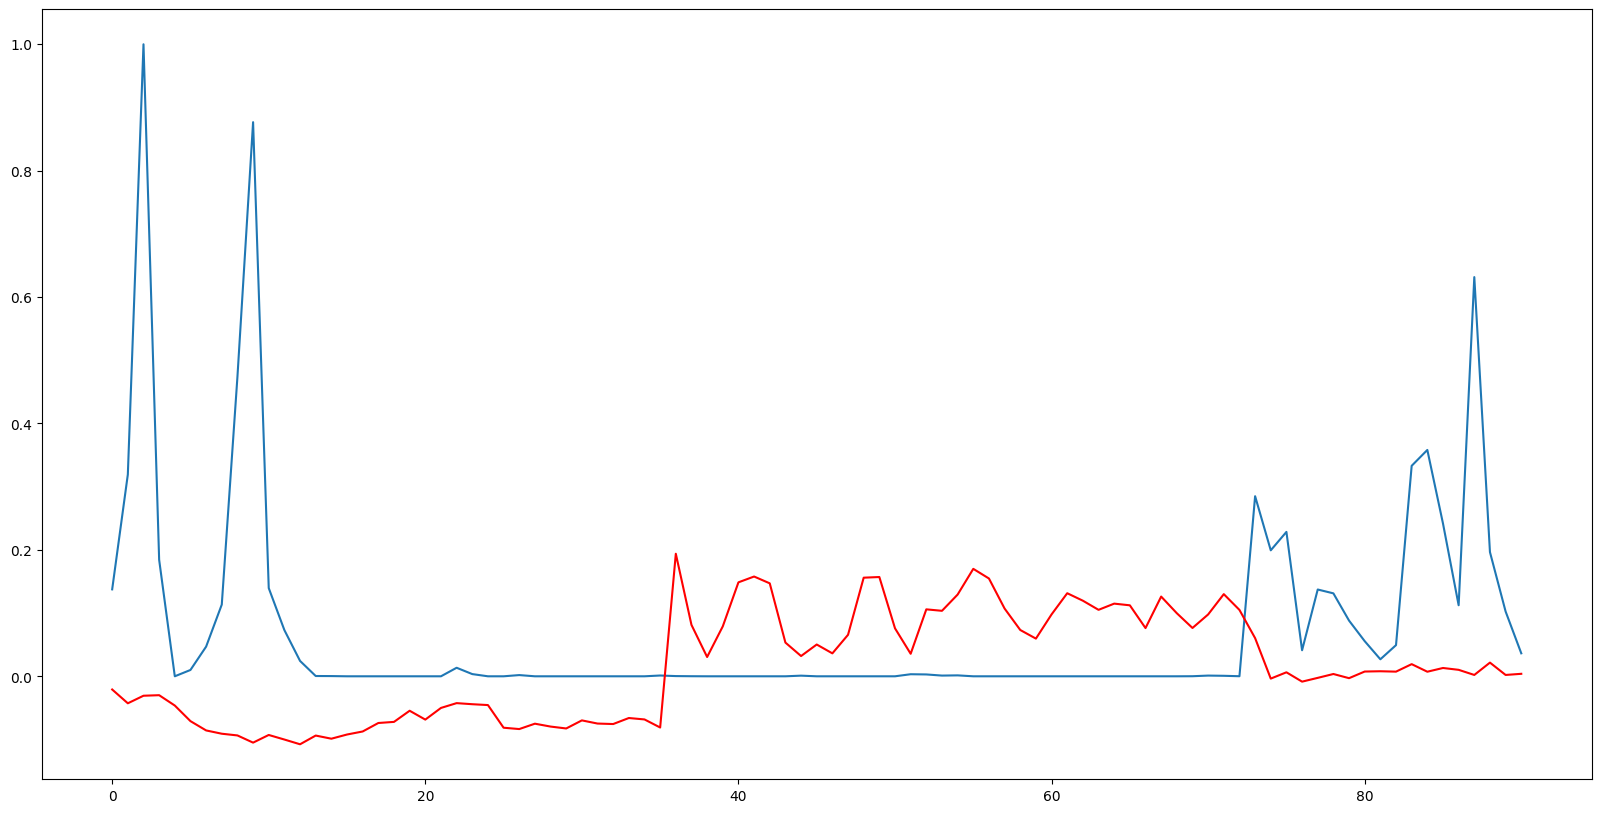

In [535]:
from matplotlib import pyplot
pyplot.figure(figsize=(20,10))
pyplot.plot(test_Y)
pyplot.plot(predicted_data, 'r')
pyplot.show()

In [536]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(test_Y, predicted_data)
mae = mean_absolute_error(test_Y, predicted_data)
accuracy = 100 - np.sqrt(mse)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('Accuracy:', accuracy)

Mean Squared Error: 0.04629188709961964
Mean Absolute Error: 0.14155802607429
Accuracy: 99.78484450483518
